### Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Read the data

In [5]:
cab= pd.read_csv('C:/Users/Payal/Desktop/DATA GLACIER/Cab_Data.csv')
city= pd.read_csv('C:/Users/Payal/Desktop/DATA GLACIER/City.csv')
customerID= pd.read_csv('C:/Users/Payal/Desktop/DATA GLACIER/Customer_ID.csv')
transactionID= pd.read_csv('C:/Users/Payal/Desktop/DATA GLACIER/Transaction_ID.csv')

### Data Intake Report

In [7]:
cab.shape

(359392, 7)

In [8]:
city.shape

(20, 3)

In [9]:
customerID.shape

(49171, 4)

In [10]:
transactionID.shape

(440098, 3)

In [11]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [12]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
customerID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
transactionID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [15]:
#Make sure there are no null values
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [16]:
#Make sure there are no null values
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [17]:
#Make sure there are no null values
customerID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [18]:
#Make sure there are no null values
transactionID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [19]:
#Seperate Pink and Yellow Cab
Pink_Cab = cab[cab['Company']=='Pink Cab']
Yellow_Cab = cab[cab['Company']=='Yellow Cab']

In [20]:
for col in cab.columns:
    if ' ' in col:
        cab = cab.rename(columns={col:col.replace(' ','_')})
        
cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [21]:
for col in transactionID.columns:
    if ' ' in col:
        transactionID = transactionID.rename(columns={col:col.replace(' ','_')})
transactionID.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [22]:
for col in customerID.columns:
    if ' ' in col:
        customerID = customerID.rename(columns={col:col.replace(' ','_')})
customerID.head()  

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [23]:

from datetime import datetime,timedelta 
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date = datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [24]:
cab['Date_of_Travel'] = cab['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [25]:
cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Merge the data

In [26]:
left = cab.set_index(['Transaction_ID'])
right = transactionID.set_index(['Transaction_ID'])
data = left.join(right)
data

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,
10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...
10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash


In [27]:
left = data.set_index([data.index,'Customer_ID'])
right = customerID.set_index(['Customer_ID'])
data = left.join(right)
data

,,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,
10000011,29290,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
10000012,27703,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
10000013,28712,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242
10000014,28020,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327
10000015,27182,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651
10440104,53286,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528
10440105,52265,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966


In [28]:
left = data.set_index([data.index,'City'])
right = city.set_index(['City'])
data = left.join(right)
data

,,,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-07,Pink Cab,30.45,370.95,313.6350,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,2016-01-05,Pink Cab,28.62,358.52,334.8540,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,2016-01-01,Pink Cab,9.04,125.20,97.6320,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,2016-01-06,Pink Cab,33.17,377.40,351.6020,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,2016-01-02,Pink Cab,8.73,114.62,97.7760,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,2018-01-07,Yellow Cab,4.80,69.24,63.3600,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,2018-01-03,Yellow Cab,8.40,113.75,106.8480,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,2018-01-04,Yellow Cab,27.75,437.07,349.6500,Cash,Male,56,7966,"418,859","127,001"


In [29]:
data['Profit'] = data['Price_Charged'] - data['Cost_of_Trip']
data.head()

,,,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-07,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701",57.315
10000012,27703,ATLANTA GA,2016-01-05,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701",23.666
10000013,28712,ATLANTA GA,2016-01-01,Pink Cab,9.04,125.20,97.632,Cash,Male,53,11242,"814,885","24,701",27.568
10000014,28020,ATLANTA GA,2016-01-06,Pink Cab,33.17,377.40,351.602,Cash,Male,23,23327,"814,885","24,701",25.798
10000015,27182,ATLANTA GA,2016-01-02,Pink Cab,8.73,114.62,97.776,Card,Male,33,8536,"814,885","24,701",16.844


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date_of_Travel      359392 non-null  datetime64[ns]
 1   Company             359392 non-null  object        
 2   KM_Travelled        359392 non-null  float64       
 3   Price_Charged       359392 non-null  float64       
 4   Cost_of_Trip        359392 non-null  float64       
 5   Payment_Mode        359392 non-null  object        
 6   Gender              359392 non-null  object        
 7   Age                 359392 non-null  int64         
 8   Income_(USD/Month)  359392 non-null  int64         
 9   Population          359392 non-null  object        
 10  Users               359392 non-null  object        
 11  Profit              359392 non-null  float64       
dtypes: datetime64[ns](1), float6

In [31]:
#Check that there are no duplicate values
data[data.duplicated(subset=None,keep='first')]

,,,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
Transaction_ID,Customer_ID,City,,,,,,,,,,,,


In [32]:
#No duplicate values were returned

In [56]:
data = data.reset_index()

In [59]:

months=[]
years =[]
for i in range(len(data['Date_of_Travel'])):
    months.append(data['Date_of_Travel'][i].month)
    years.append(data['Date_of_Travel'][i].year)
data['Month'] = months
data['Year'] = years

data= data.drop(['Date_of_Travel'],axis=1)


# Exploratory Data Analysis

### Monthly Travel Frequency

In [60]:
plot = cab[cab.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

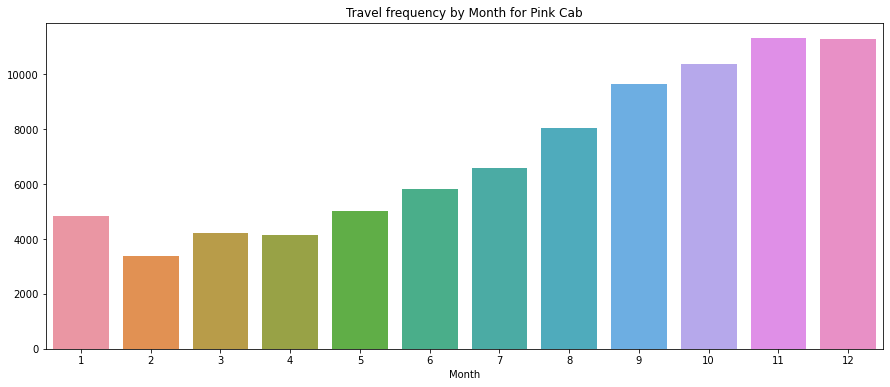

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title('Travel frequency by Month for Pink Cab')
plt.show()

In [62]:
plot = cab[cab.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

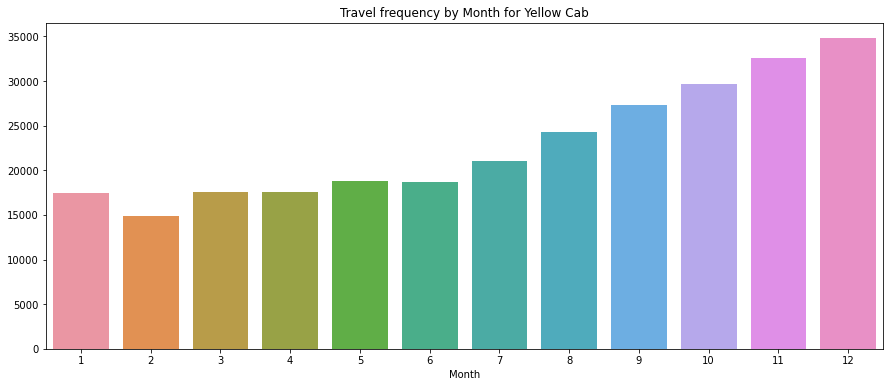

In [63]:
plt.figure(figsize=(15,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title('Travel frequency by Month for Yellow Cab')
plt.show()

### Citywise Analysis

In [64]:
city_pink = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_pink

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

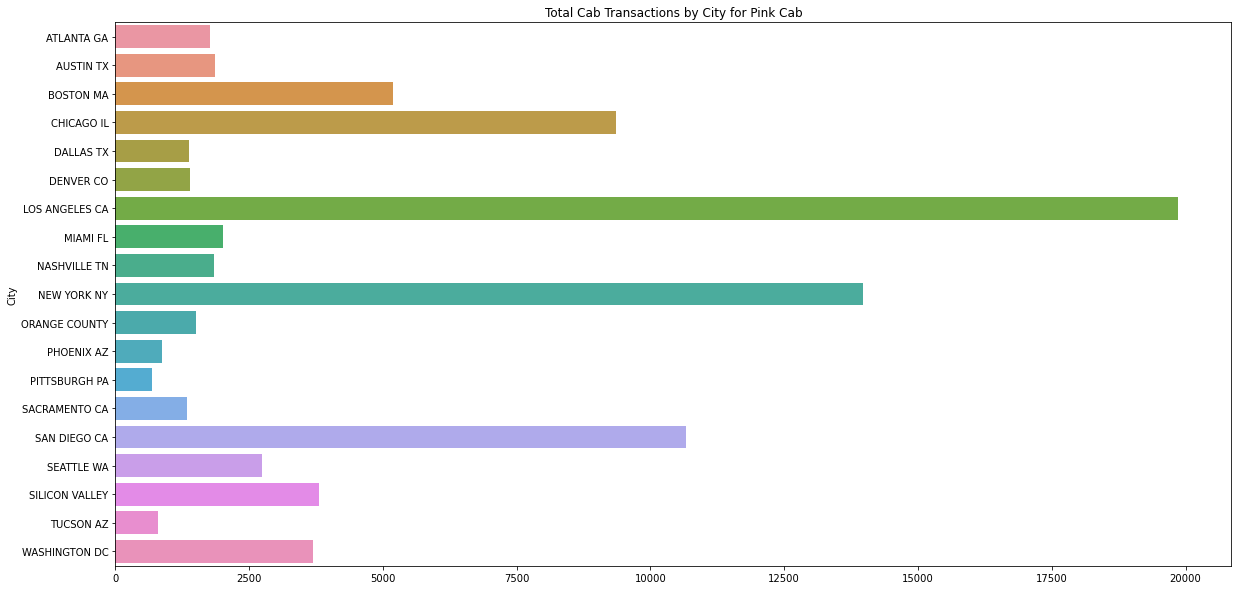

In [65]:
plt.figure(figsize = (20,10))
sns.barplot(x = city_pink.values, y = city_pink.index)
plt.title('Total Cab Transactions by City for Pink Cab')
plt.show()

In [66]:
city_yellow = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_yellow

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

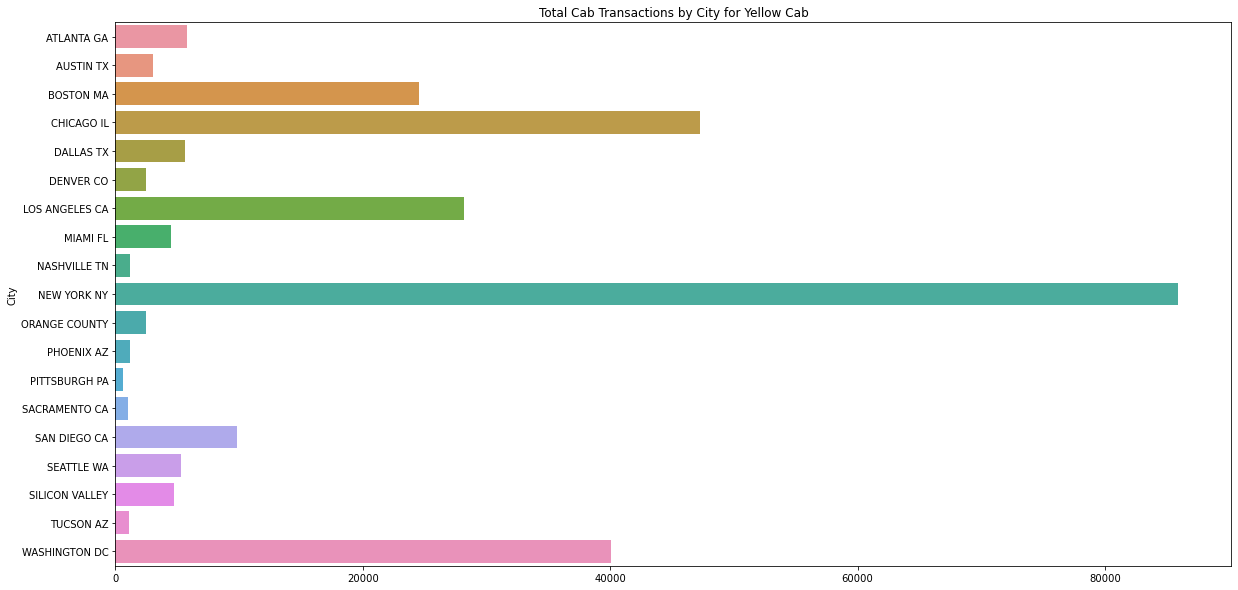

In [67]:
plt.figure(figsize = (20,10))
sns.barplot(x = city_yellow.values, y = city_yellow.index)
plt.title('Total Cab Transactions by City for Yellow Cab')
plt.show()

In [68]:
Pink_Cab = data[data['Company']=='Pink Cab']
Yellow_Cab = data[data['Company']=='Yellow Cab']

Text(0.5, 0, 'Pink Cab KM Travelled')

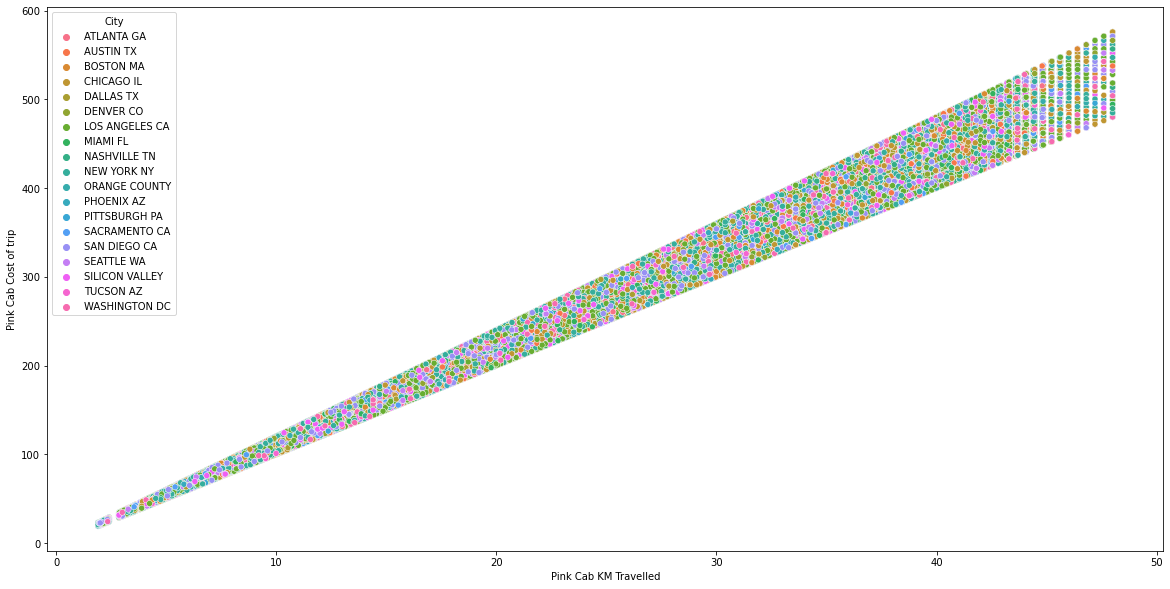

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x=Pink_Cab["KM_Travelled"], y=Pink_Cab["Cost_of_Trip"], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

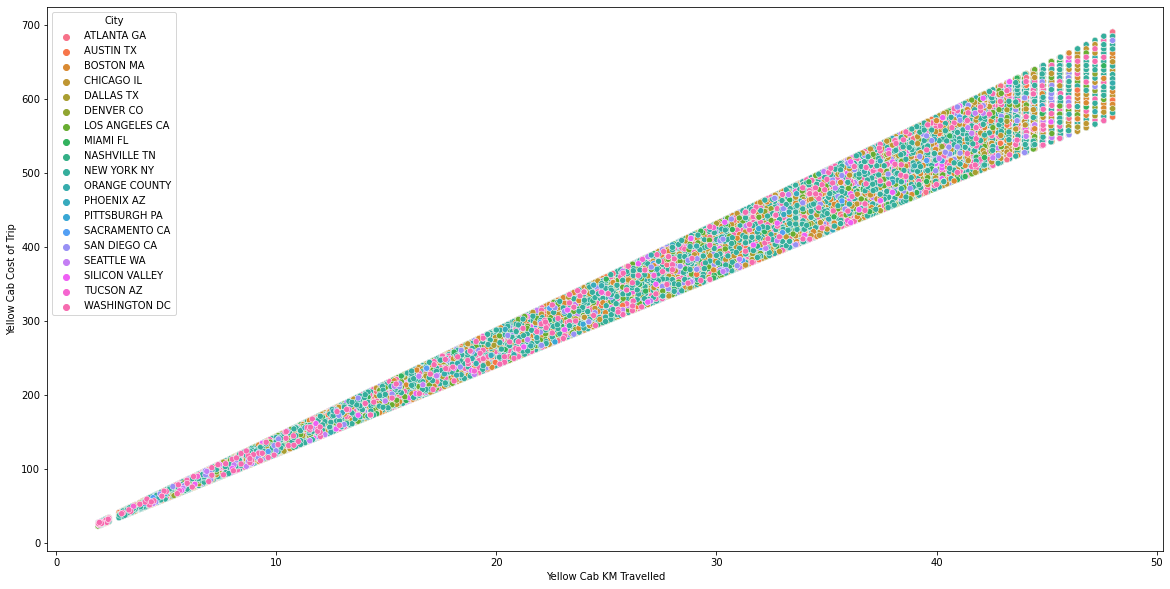

In [70]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x=Yellow_Cab["KM_Travelled"], y=Yellow_Cab['Cost_of_Trip'], hue="City")
plt.ylabel('Yellow Cab Cost of Trip')
plt.xlabel('Yellow Cab KM Travelled')

In [71]:
# Both cabs approximately travel between 2km to 48km and the cost of trip of Yellow Cab are slightly higher

Text(0.5, 0, 'Pink Cab KM Travelled')

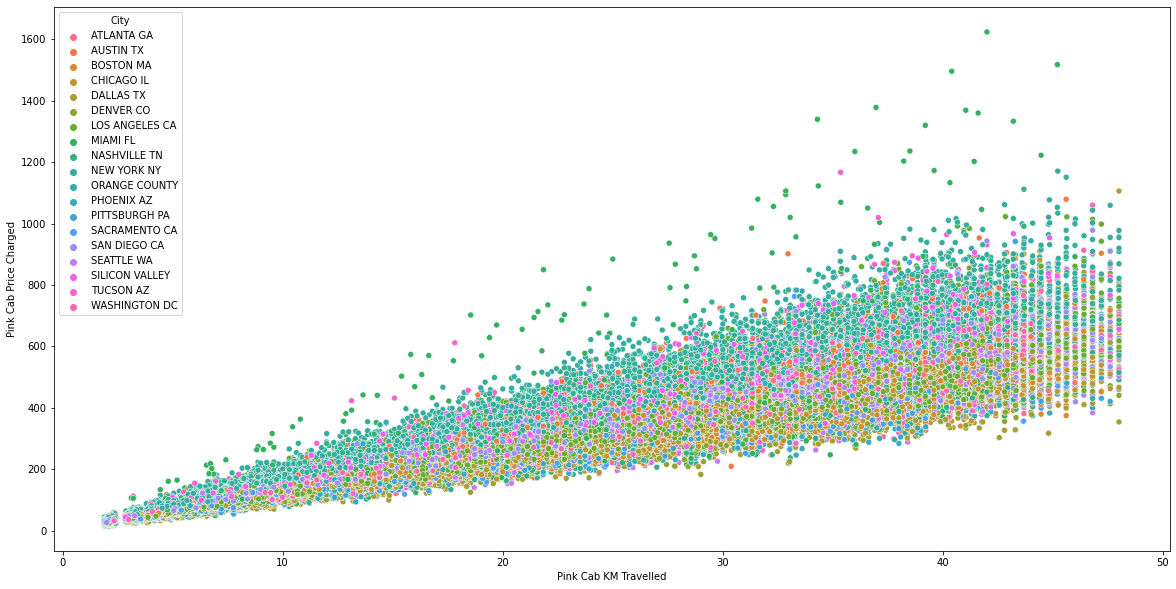

In [72]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=Pink_Cab["KM_Travelled"], y=Pink_Cab['Price_Charged'], hue="City")
plt.ylabel('Pink Cab Price Charged')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

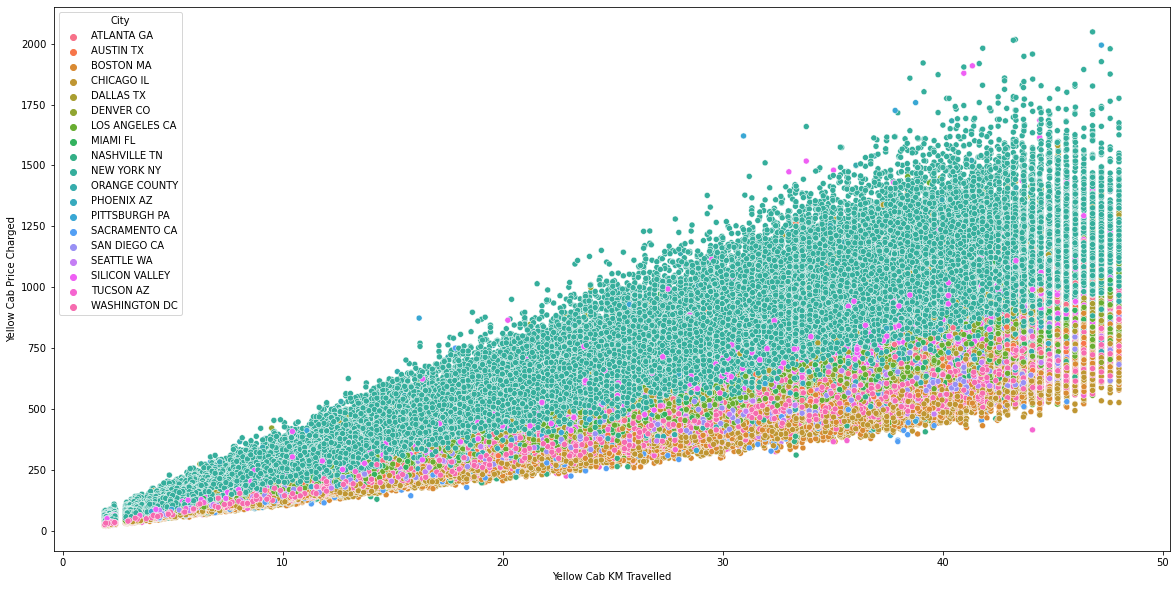

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=Yellow_Cab["KM_Travelled"], y=Yellow_Cab['Price_Charged'], hue="City")
plt.ylabel('Yellow Cab Price Charged')
plt.xlabel('Yellow Cab KM Travelled')

In [74]:
Pink_Cab['KM_Travelled'].corr(Pink_Cab['Price_Charged'])

0.9277652782594857

In [75]:
Yellow_Cab['KM_Travelled'].corr(Yellow_Cab['Price_Charged'])

0.8597086294478461

In [76]:
# There is a positive correlation between price charged and kilometers travelled for both Pink and Yellow cab. However, from the 
#above two plots we see that Yellow cab charges more per kilometers travelled.

### Yearly Transactions

In [77]:
yearly_transactions = data.groupby(['Year','Company']).Transaction_ID.count()
yearly_transactions

Year  Company   
2016  Pink Cab      25285
      Yellow Cab    82937
2017  Pink Cab      30205
      Yellow Cab    97759
2018  Pink Cab      29221
      Yellow Cab    93985
Name: Transaction_ID, dtype: int64

<AxesSubplot:title={'center':'Transactions per Year'}, xlabel='Year', ylabel='Transactions'>

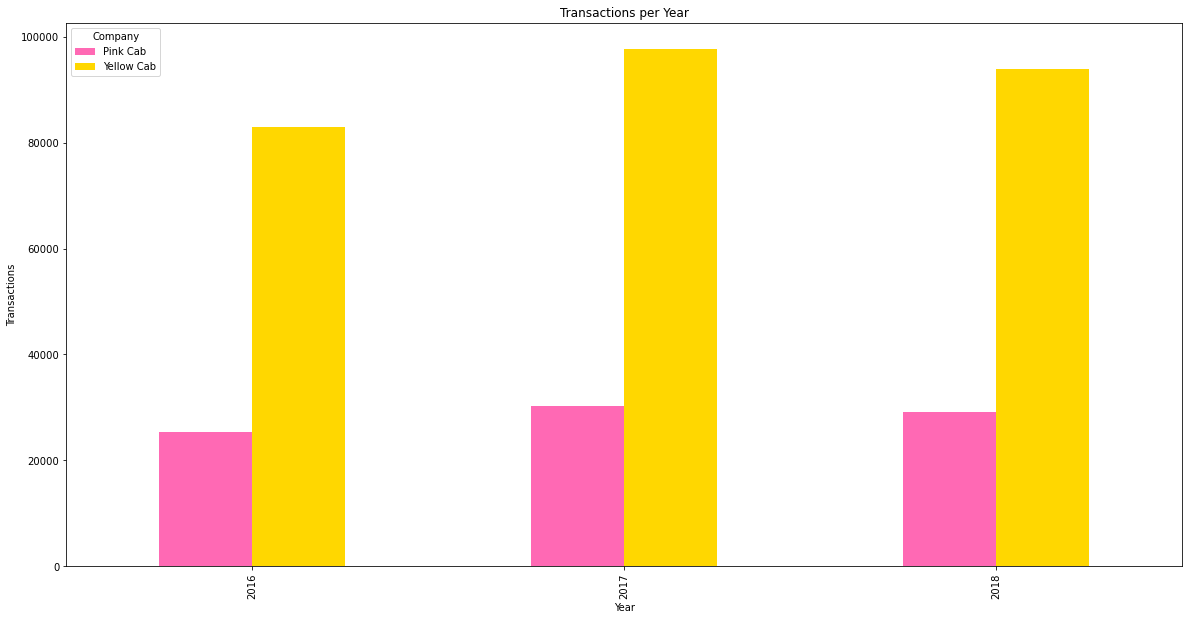

In [165]:

fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel("Transactions")
plt.title("Transactions per Year")
yearly_transactions.unstack().plot(ax=ax, kind = 'bar', color = ['hotpink','gold'])

### Monthly Profit

In [86]:
monthly_profits = data.groupby(['Month','Company']).Profit.mean()
monthly_profits

Month  Company   
1      Pink Cab       73.910162
       Yellow Cab    184.705758
2      Pink Cab       74.796142
       Yellow Cab    199.312910
3      Pink Cab       71.076403
       Yellow Cab    180.311724
4      Pink Cab       59.558302
       Yellow Cab    179.855370
5      Pink Cab       33.792222
       Yellow Cab    210.884085
6      Pink Cab       39.588715
       Yellow Cab    188.934292
7      Pink Cab       45.766444
       Yellow Cab    135.328482
8      Pink Cab       50.812533
       Yellow Cab    121.321650
9      Pink Cab       52.356789
       Yellow Cab    154.901858
10     Pink Cab       64.876744
       Yellow Cab    138.816875
11     Pink Cab       74.292478
       Yellow Cab    144.126880
12     Pink Cab       90.258236
       Yellow Cab    148.427151
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Average Monthly Profit')

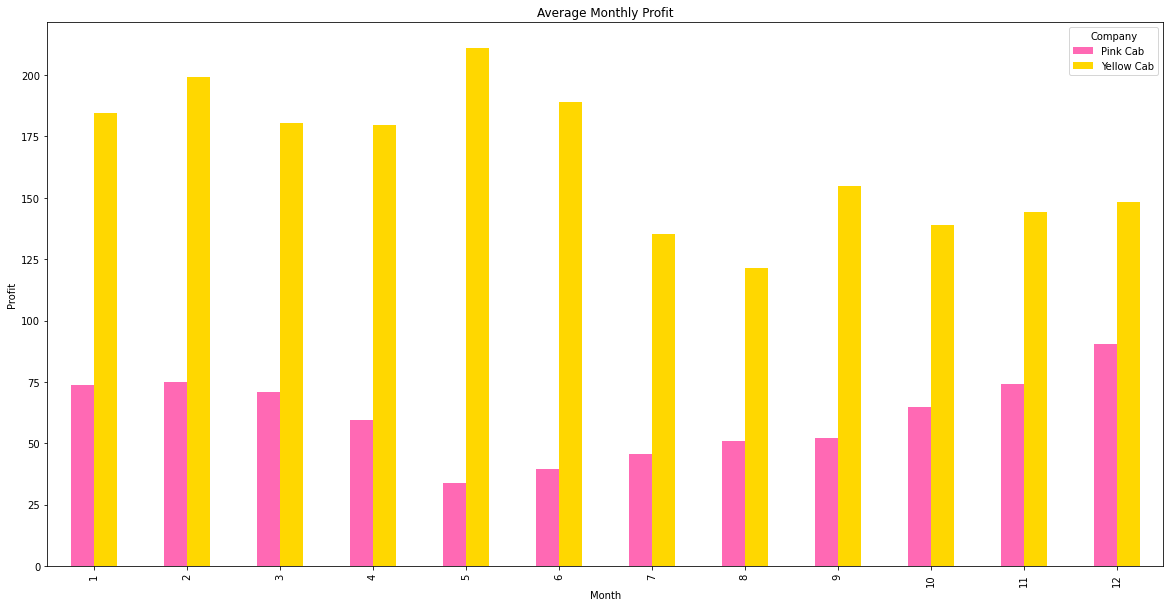

In [105]:
fig, ax = plt.subplots(figsize=(20,10))
monthly_profits.unstack().plot(ax=ax, kind = 'bar', color = ['hotpink','gold'])
plt.ylabel("Profit")
plt.title("Average Monthly Profit")

### Total Profit

In [108]:
total_yearly_profit= data.groupby(['Year','Company']).Profit.sum()
total_yearly_profit

Year  Company   
2016  Pink Cab      1.739883e+06
      Yellow Cab    1.407389e+07
2017  Pink Cab      2.015101e+06
      Yellow Cab    1.646427e+07
2018  Pink Cab      1.552345e+06
      Yellow Cab    1.348222e+07
Name: Profit, dtype: float64

Text(0, 0.5, 'Profit (in millions)')

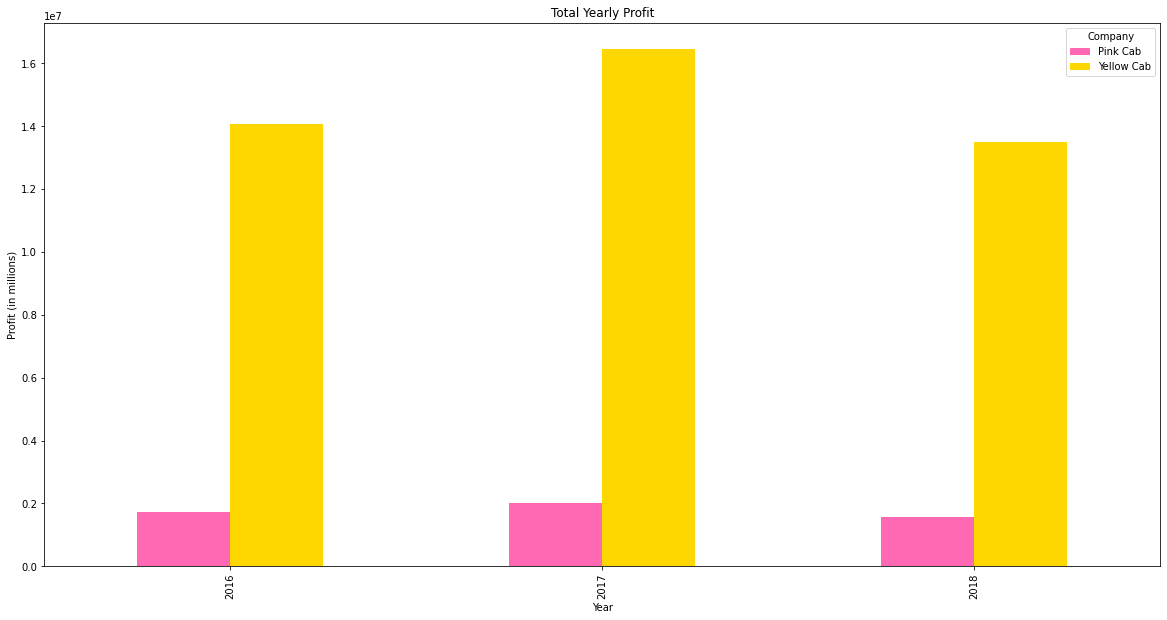

In [109]:
fig, ax = plt.subplots(figsize=(20,10))
total_yearly_profit.unstack().plot(ax=ax, kind = 'bar', color = ['hotpink','gold'])
plt.title("Total Yearly Profit")
plt.ylabel("Profit (in millions)")

### Gender Analysis

In [111]:
gender_yellow=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_yellow

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

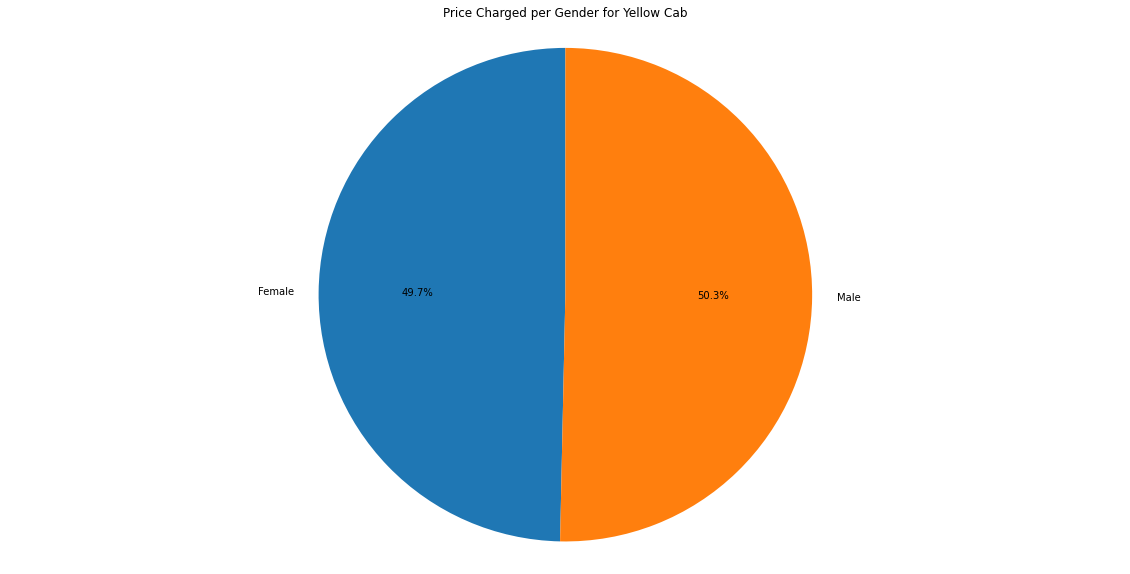

In [120]:
labs = gender_yellow.index
vals = gender_yellow.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [113]:
gender_pink=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_pink

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

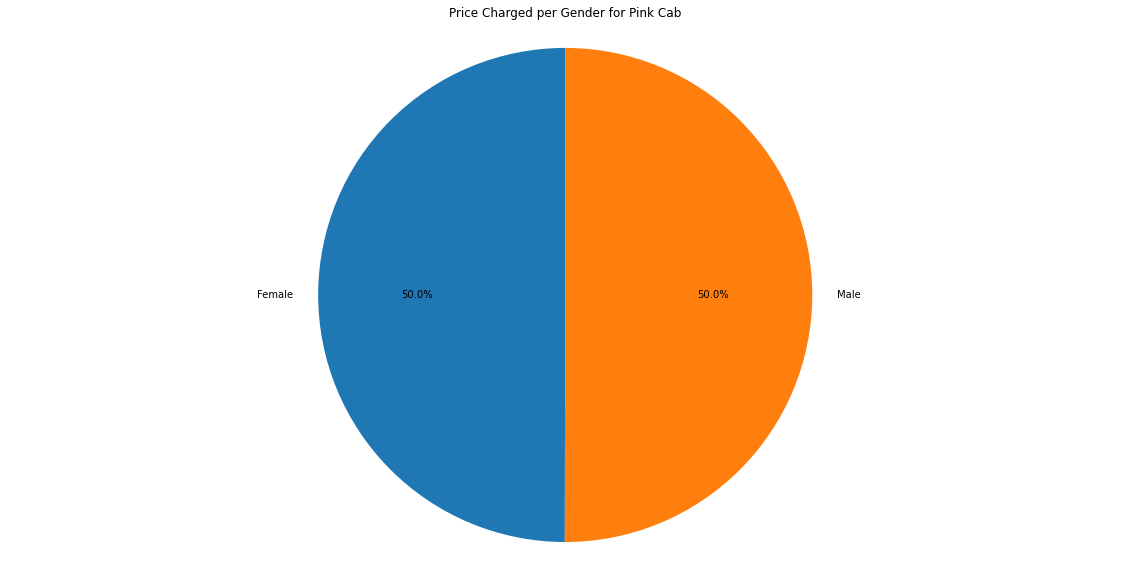

In [121]:
labs = gender_pink.index
vals = gender_pink.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

In [116]:
#Yellow Cab charges slightly less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

In [117]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

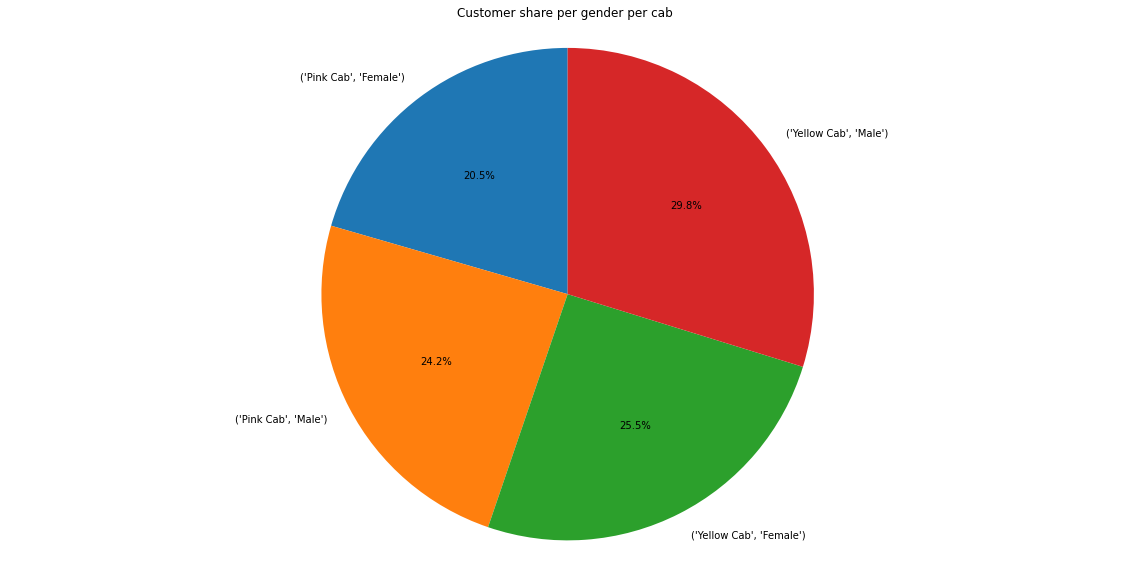

In [119]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

In [ ]:
#Both cabs have more male customers

### Age Analysis

In [145]:
mean_age = data.groupby('Company').Age.mean()
mean_age

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

In [146]:
# Mean age is customers is fairly same in both cabs

In [153]:
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
data['Age Range'] = pd.cut(data.Age, bins, labels = labels,include_lowest = True)

In [154]:
age_range_per_cab = data.groupby(['Age_range', 'Company']).Customer_ID.nunique()
age_range_per_cab

Age_range  Company   
18-19      Pink Cab       2090
           Yellow Cab     2536
20-29      Pink Cab      10384
           Yellow Cab    12835
30-39      Pink Cab      10211
           Yellow Cab    12628
40-49      Pink Cab       4152
           Yellow Cab     5152
50-59      Pink Cab       3402
           Yellow Cab     4238
60+        Pink Cab       2091
           Yellow Cab     2507
Name: Customer_ID, dtype: int64

<AxesSubplot:xlabel='Age_range'>

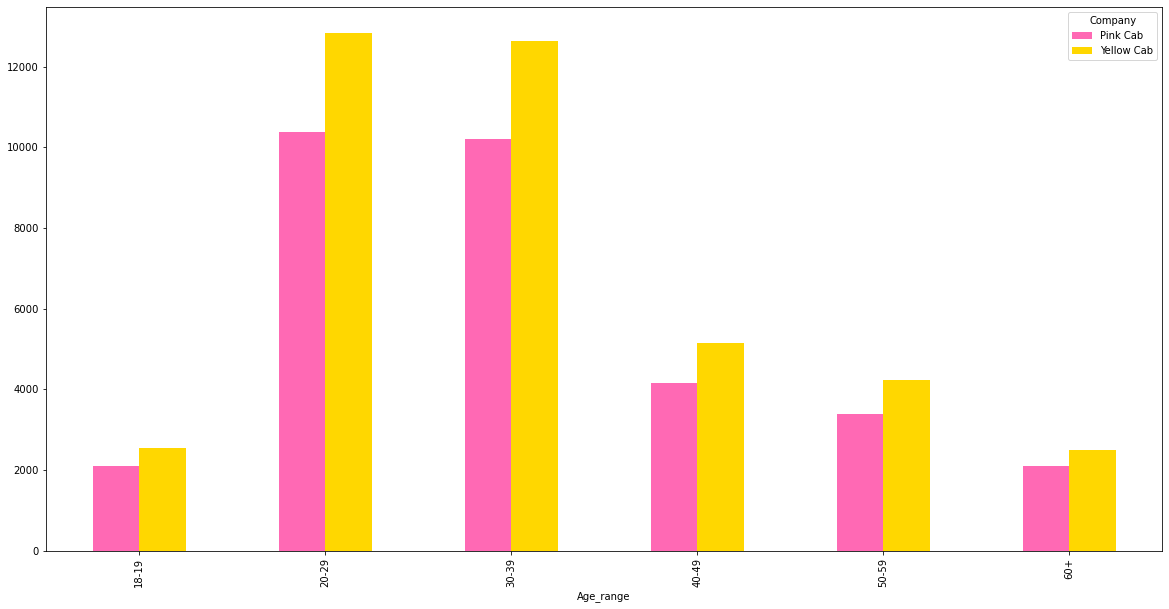

In [155]:
fig, ax = plt.subplots(figsize=(20,10))
age_range_per_cab.unstack().plot(ax=ax,kind = 'bar', color = ['hotpink', 'gold'])

array([<AxesSubplot:ylabel='Customer_ID'>], dtype=object)

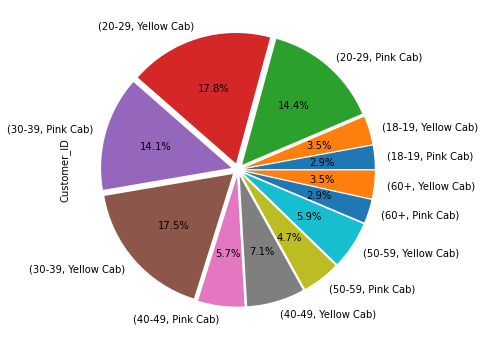

In [156]:
age_range_per_cab.plot.pie(subplots=True, figsize=(15, 6), explode=[0.05]*12, autopct='%1.1f%%')

### Payment Mode Analysis

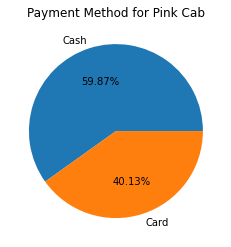

In [162]:
PaymentMode_Pink= Pink_Cab['Payment_Mode'].value_counts(normalize=True) * 100
plt.pie(PaymentMode_Pink, labels=['Cash', 'Card'] ,autopct='%.2f%%')
plt.title('Payment Method for Pink Cab')
plt.show()

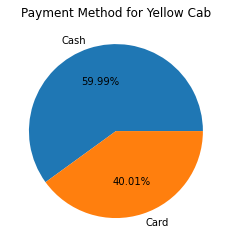

In [163]:
PaymentMode_Yellow= Yellow_Cab['Payment_Mode'].value_counts(normalize=True) * 100
plt.pie(PaymentMode_Yellow, labels=['Cash', 'Card'] ,autopct='%.2f%%')
plt.title('Payment Method for Yellow Cab')
plt.show()

### Data Correlation

In [122]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income_(USD/Month)','Profit']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Profit
KM_Travelled,1.000000,0.835753,0.981848,-0.001773,-0.001094,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.059639,-0.036903,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008309,-0.001766,-0.000189,-0.000633,0.486056
Month,-0.001773,-0.059639,-0.008309,1.000000,-0.033169,-0.002376,0.000585,-0.093886
Year,-0.001094,-0.036903,-0.001766,-0.033169,1.000000,-0.000497,-0.001679,-0.061420
Age,-0.000369,-0.003084,-0.000189,-0.002376,-0.000497,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.000585,-0.001679,0.003907,1.000000,0.006148
Profit,0.462768,0.864154,0.486056,-0.093886,-0.061420,-0.005093,0.006148,1.000000


<AxesSubplot:>

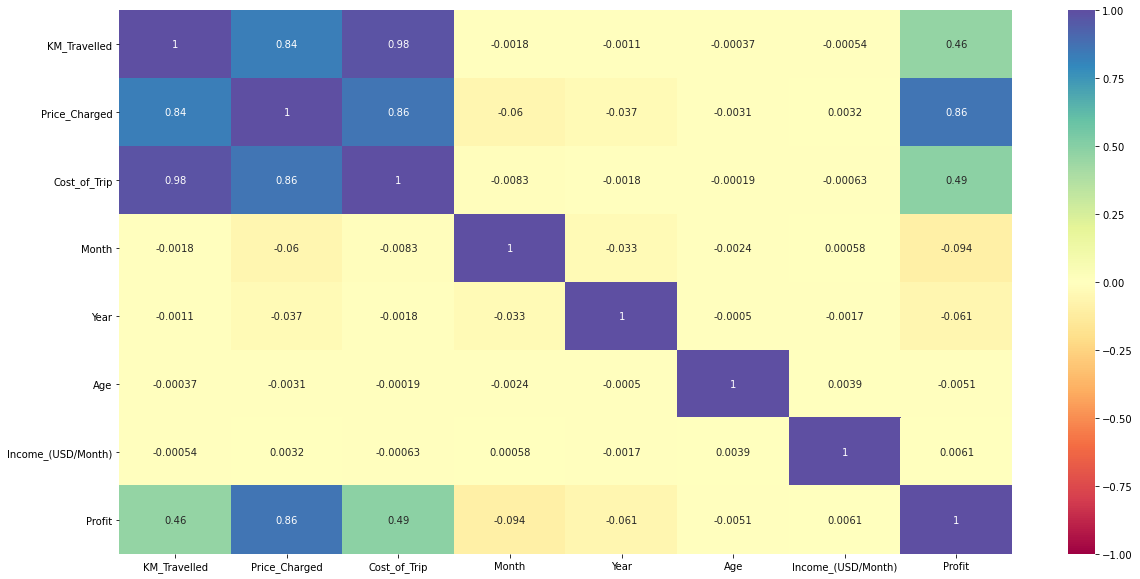

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='Spectral')

In [ ]:
#Strong correlation is seen between price charged, km travelled and profit

# HYPOTHESIS TESTING

### H0 : There is no difference in mean profit for Payment Mode in Pink Cab.

### HA : There is difference in mean profit for Payment Mode in Pink Cab.

In [166]:
H0 = 'There is no difference in mean profit for Payment Mode in Pink Cab.'

HA = 'There is difference in mean profit for Payment Mode in Pink Cab.'

a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)
    
    
    

We accept the null hypothesis
There is no difference in mean profit for Payment Mode in Pink Cab.
P value is  0.7900465828793288


### H0 : There is no difference in mean profit for Payment Mode in Yellow Cab.

### HA : There is difference in mean profit for Payment Mode in Yellow Cab.

In [167]:
H0 = 'There is no difference in mean profit for Payment Mode in Yellow Cab.'

HA = 'There is difference in mean profit for Payment Mode in Yellow Cab.'


a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is no difference in mean profit for Payment Mode in Yellow Cab.
P value is  0.2933060638298729


### H0 : There is no difference in KM Travelled by Females compared to Males for Yellow Cab.

### HA : There is a difference in KM Travelled by Females compared to Males for Yellow Cab.

In [169]:

H0 = 'There is no difference in KM Travelled by Females compared to Males for Yellow Cab.'

HA = 'There is a difference in KM Travelled by Females compared to Males for Yellow Cab.'


a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()

from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is no difference in KM Travelled by Females compared to Males for Yellow Cab.
P value is  0.5146654429411317


### H0 : There is no difference in KM Travelled by Females compared to Males for Pink Cab.

### HA : There is a difference in KM Travelled by Females compared to Males for Pink Cab.

In [170]:
H0 = 'There is no difference in KM Travelled by Females compared to Males for Pink Cab.'

HA = 'There is a difference in KM Travelled by Females compared to Males for Pink Cab.'


a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').KM_Travelled.mean()

from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is no difference in KM Travelled by Females compared to Males for Pink Cab.
P value is  0.6164626165258722


### H0 : There is no difference in Average Profit for Gender Yellow Cab.

### HA : There is a difference in Average Profit for Gender in Yellow Cab.

In [172]:
H0 ='There is no difference in Average Profit for Gender Yellow Cab.'

HA ='There is a difference in Average Profit for Gender in Yellow Cab.'

a = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We reject the null hypothesis
There is a difference in Average Profit for Gender in Yellow Cab.
P value is  6.060473042494144e-25


### H0 : There is no difference in Average Profit for Gender Pink Cab.

### HA : There is a difference in Average Profit for Gender in Pink Cab.

In [184]:
H0 ='There is no difference in Average Profit for Gender Pink Cab.'

HA ='There is a difference in Average Profit for Gender in Pink Cab.'

a = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is no difference in Average Profit for Gender Pink Cab.
P value is  0.11515305900425798


### H0 : There is no difference in Average Profit for customers aged 50 and above in Yellow Cab.

### HA : There is a difference in Average Profit for customers aged 50 and above in Yellow Cab.

In [183]:
H0 = 'There is no difference in Average Profit for customers aged 50 and above in Yellow Cab.'

HA = 'There is a difference in Average Profit for customers aged 50 and above in Yellow Cab.'

a = data[(data.Age <= 50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Age > 50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()


from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We reject the null hypothesis
There is a difference in Average Profit for customers aged 50 and above in Yellow Cab.
P value is  6.494256817799368e-09


### H0 : There is no difference in Average Profit for customers aged 50 and above in Pink Cab.

### HA : There is a difference in Average Profit for customers aged 50 and above in Pink Cab.

In [182]:
H0 = 'There is no difference in Average Profit for customers aged 50 and above in Pink Cab.'

HA = 'There is a difference in Average Profit for customers aged 50 and above in Pink Cab.'

a = data[(data.Age <= 50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = data[(data.Age > 50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()


from scipy import stats
_,p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print( 'We reject the null hypothesis')
    print(HA)
else:
    print('We accept the null hypothesis')
    print(H0)
    
print('P value is ', p_value)

We accept the null hypothesis
There is no difference in Average Profit for customers aged 50 and above in Pink Cab.
P value is  0.32817487547980695
